# Laboratorio 5
Alina Carías, Daniel Machic y Ariela Mishaan

**Github:** https://github.com/ArielaMishaanCohen/LAB5.git

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Task 1

### Set de Control

6343
Matches buenos encontrados 1226


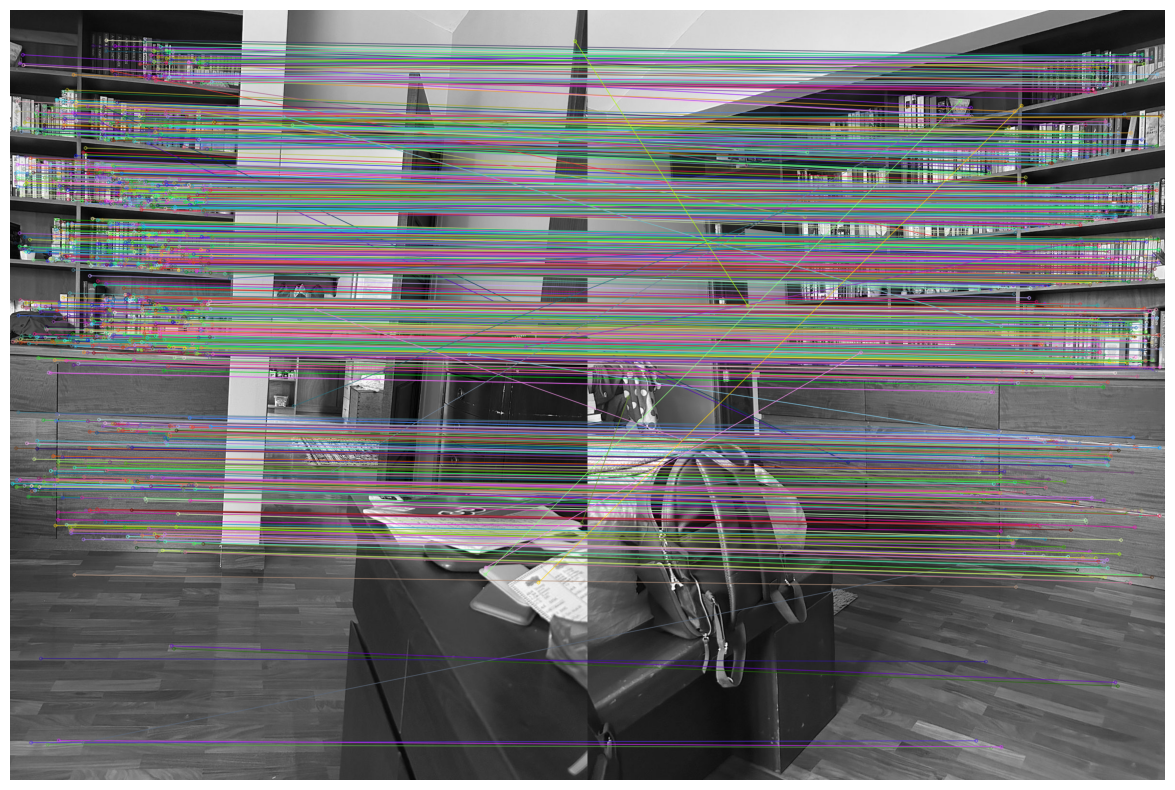

In [2]:
# cargar las imágenes
img_left = cv2.imread('control1.jpeg')
img_right = cv2.imread('control2.jpeg')

# convertir en grises
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

# SIFT para detectar keypoints
sift = cv2.SIFT_create()
kp_left, des_left = sift.detectAndCompute(gray_left, None) #Train (destino)
kp_right, des_right = sift.detectAndCompute(gray_right, None) #Query (origen)

# Matching Flann
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# derecha es query
# izquierda es nuestro train
matches = flann.knnMatch(des_right, des_left, k = 2)
print(len(matches)) # son como 10 000 matches 

# lowe ratio test
good_matches = []
for m, n in matches: 
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

print(f"Matches buenos encontrados {len(good_matches)}")

# visualización
img_matches = cv2.drawMatches(gray_right, kp_right, gray_left, kp_left, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20, 10))
plt.imshow(img_matches)
plt.axis('off')
plt.show()  

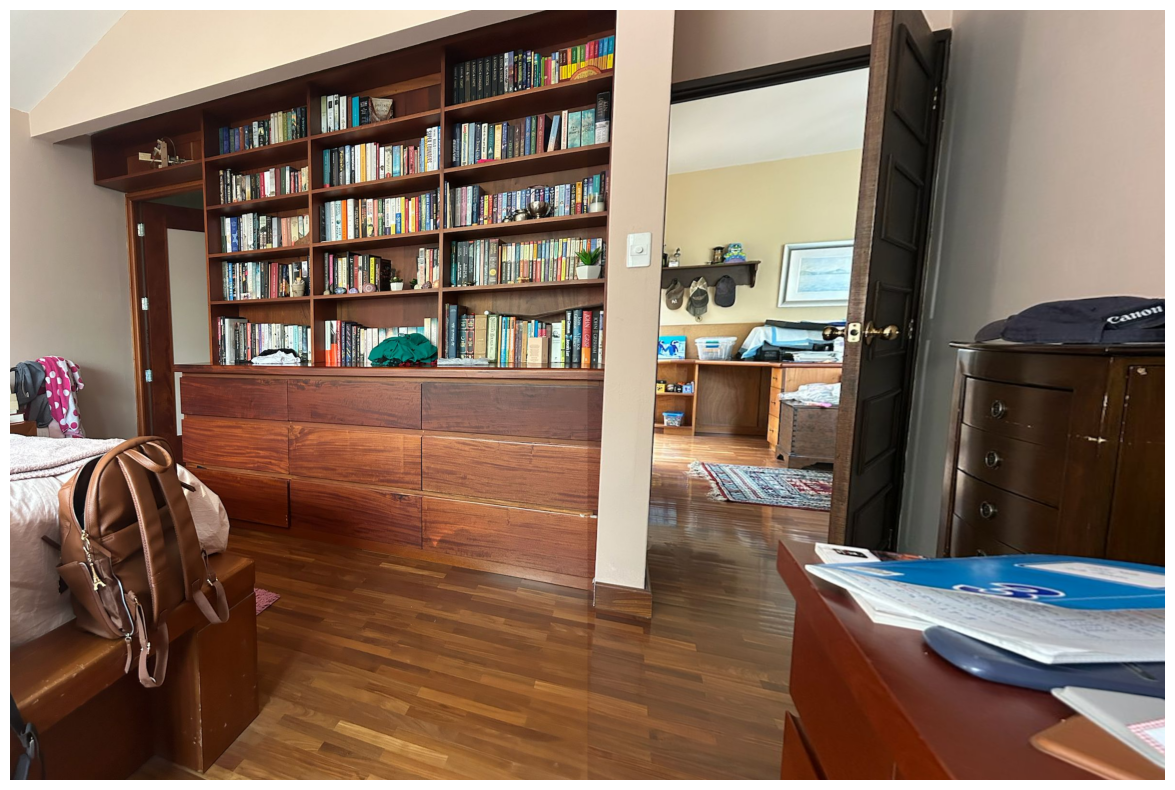

In [3]:
# homografía 

# extraer coordenadas de lso puntos 
src_pts = np.float32([kp_right[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp_left[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# ransac
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# wrap * deformación
# calcular nuestro canvas / lienzo
h_left, w_left = img_left.shape[:2]
h_right, w_right = img_right.shape[:2]

# ancho = i1.w + i2.w
canvas_w = w_left + w_right
canvas_h = max(h_left, h_right)

# deformamos la imagen de la derecha. Como la base es la izquiera, la derecha se moverá hacia coorddenadas positivas
panorama = cv2.warpPerspective(img_right, M, (canvas_w, canvas_h))
panorama[0:h_left, 0:w_left] = img_left

dst_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(dst_rgb)
plt.axis('off')
plt.show()

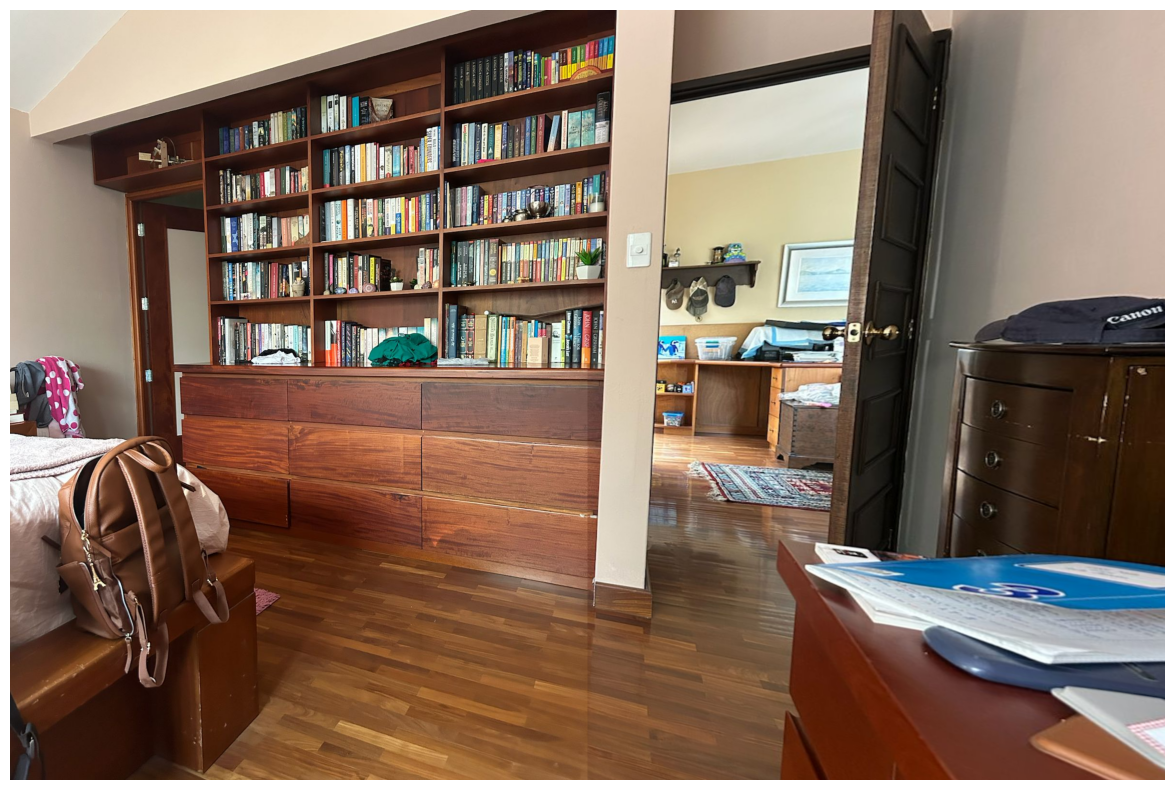

In [4]:
panorama_gray = cv2.cvtColor(panorama, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(panorama_gray, 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
left_on_canvas = np.zeros_like(panorama)
left_on_canvas[0:h_left, 0:w_left] = img_left

img_left_part = cv2.bitwise_and(left_on_canvas, left_on_canvas, mask=mask_inv)
img_panorama_part = cv2.bitwise_and(panorama, panorama, mask=mask)
final_panorama = cv2.add(img_left_part, img_panorama_part)

dst_rgb = cv2.cvtColor(final_panorama, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(dst_rgb)
plt.axis('off') 
plt.show()

### Set Experimental

3208
Matches buenos encontrados 202


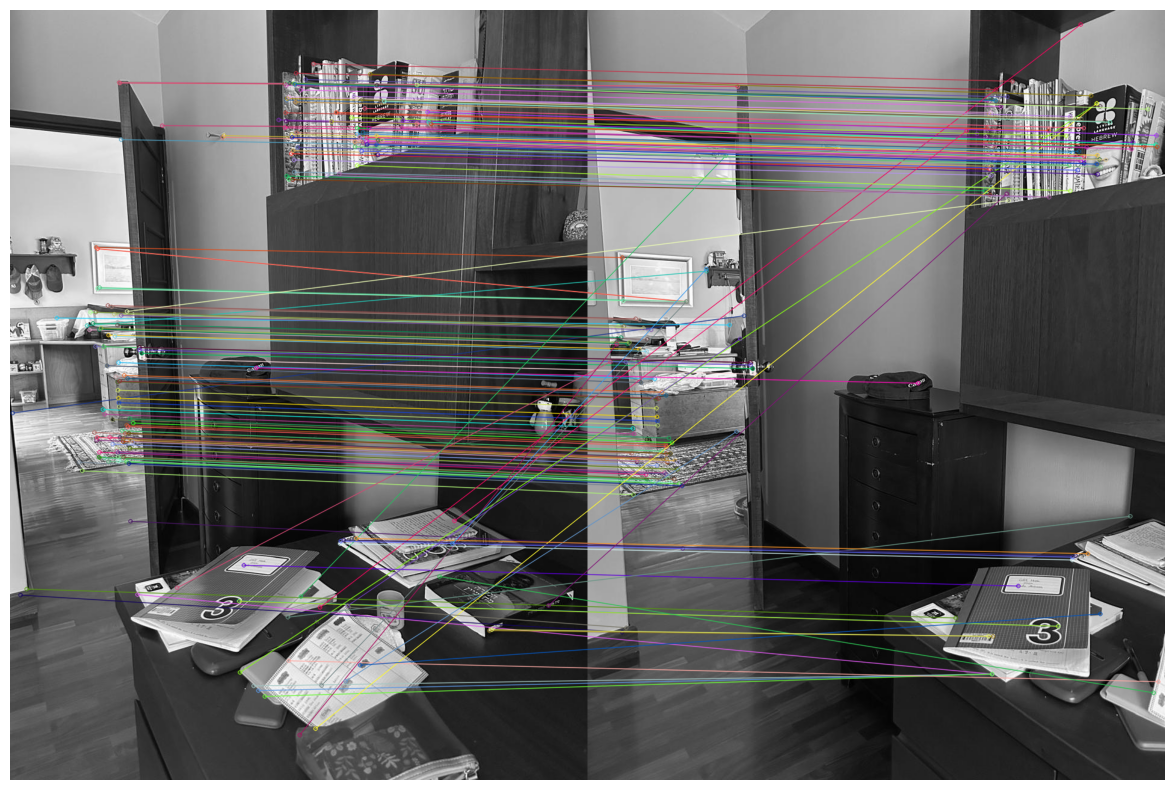

In [5]:
# cargar las imágenes
img_left = cv2.imread("exp1.jpeg")
img_right = cv2.imread("exp2.jpeg")

# convertir en grises
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

# SIFT para detectar keypoints
sift = cv2.SIFT_create()
kp_left, des_left = sift.detectAndCompute(gray_left, None) #Train (destino)
kp_right, des_right = sift.detectAndCompute(gray_right, None) #Query (origen)

# Matching Flann
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# derecha es query
# izquierda es nuestro train
matches = flann.knnMatch(des_right, des_left, k = 2)
print(len(matches)) # son como 10 000 matches 

# lowe ratio test
good_matches = []
for m, n in matches: 
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

print(f"Matches buenos encontrados {len(good_matches)}")

# visualización
img_matches = cv2.drawMatches(gray_right, kp_right, gray_left, kp_left, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20, 10))
plt.imshow(img_matches)
plt.axis('off')
plt.show()  

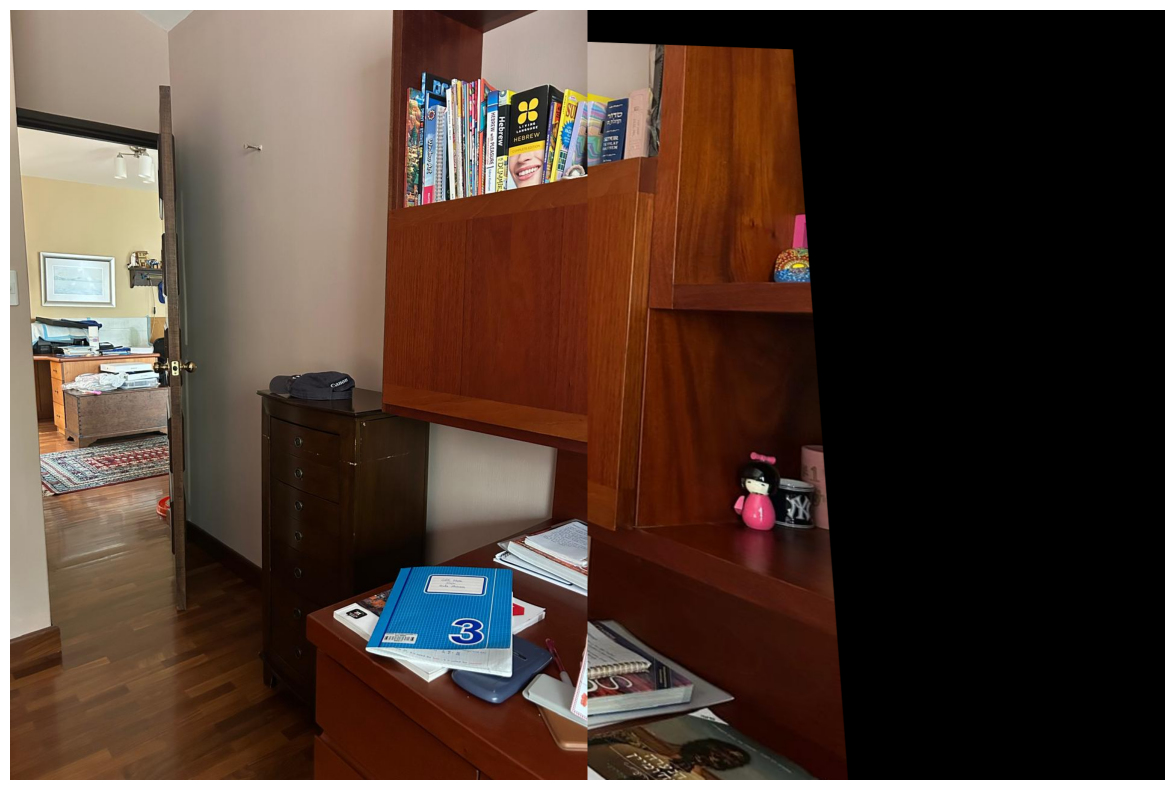

In [6]:
# homografía 

# extraer coordenadas de lso puntos 
src_pts = np.float32([kp_right[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp_left[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# ransac
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# wrap * deformación
# calcular nuestro canvas / lienzo
h_left, w_left = img_left.shape[:2]
h_right, w_right = img_right.shape[:2]

# ancho = i1.w + i2.w
canvas_w = w_left + w_right
canvas_h = max(h_left, h_right)

# deformamos la imagen de la derecha. Como la base es la izquiera, la derecha se moverá hacia coorddenadas positivas
panorama = cv2.warpPerspective(img_right, M, (canvas_w, canvas_h))
panorama[0:h_left, 0:w_left] = img_left

dst_rgb = cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(dst_rgb)
plt.axis('off')
plt.show()

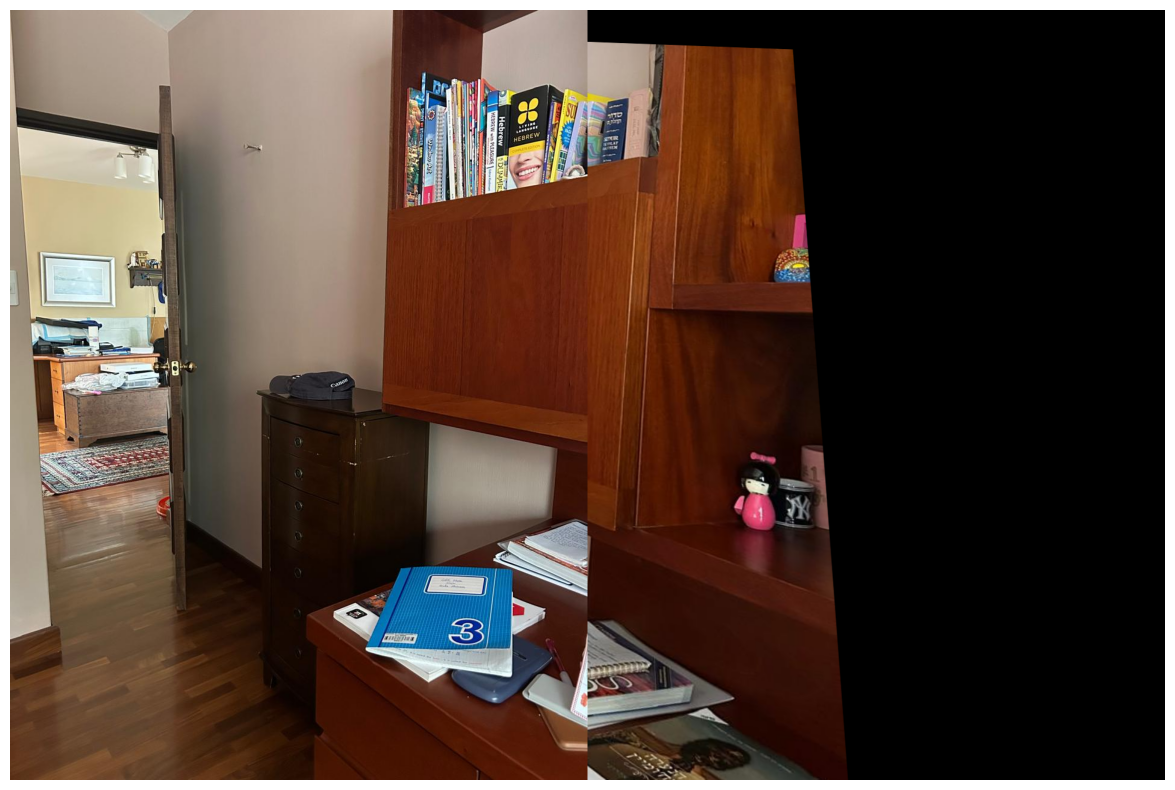

In [7]:
panorama_gray = cv2.cvtColor(panorama, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(panorama_gray, 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
left_on_canvas = np.zeros_like(panorama)
left_on_canvas[0:h_left, 0:w_left] = img_left

img_left_part = cv2.bitwise_and(left_on_canvas, left_on_canvas, mask=mask_inv)
img_panorama_part = cv2.bitwise_and(panorama, panorama, mask=mask)
final_panorama = cv2.add(img_left_part, img_panorama_part)

dst_rgb = cv2.cvtColor(final_panorama, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(dst_rgb)
plt.axis('off') 
plt.show()

Se puede ver que por el paralaje, la foto no se alinea bien. 

## Task 2

### Task 2.1 Vizualicación de error

Se le pregunto al asistente virtual Claude.ia el prompt dado por el profesor: 

“Actúa como ingeniero de visión artificial. Tengo dos imágenes: la imagen base (izquierda) y la imagen
warped (derecha transformada). Escribe un código en Python que genere una imagen compuesta
(blending) donde la imagen base se muestre en el canal Rojo y la imagen warped en el canal Cian
(Verde+Azul). Esto debe crear un efecto de anaglifo donde los píxeles perfectamente alineados se vean en
escala de grises y los errores se vean como bordes de colores.”

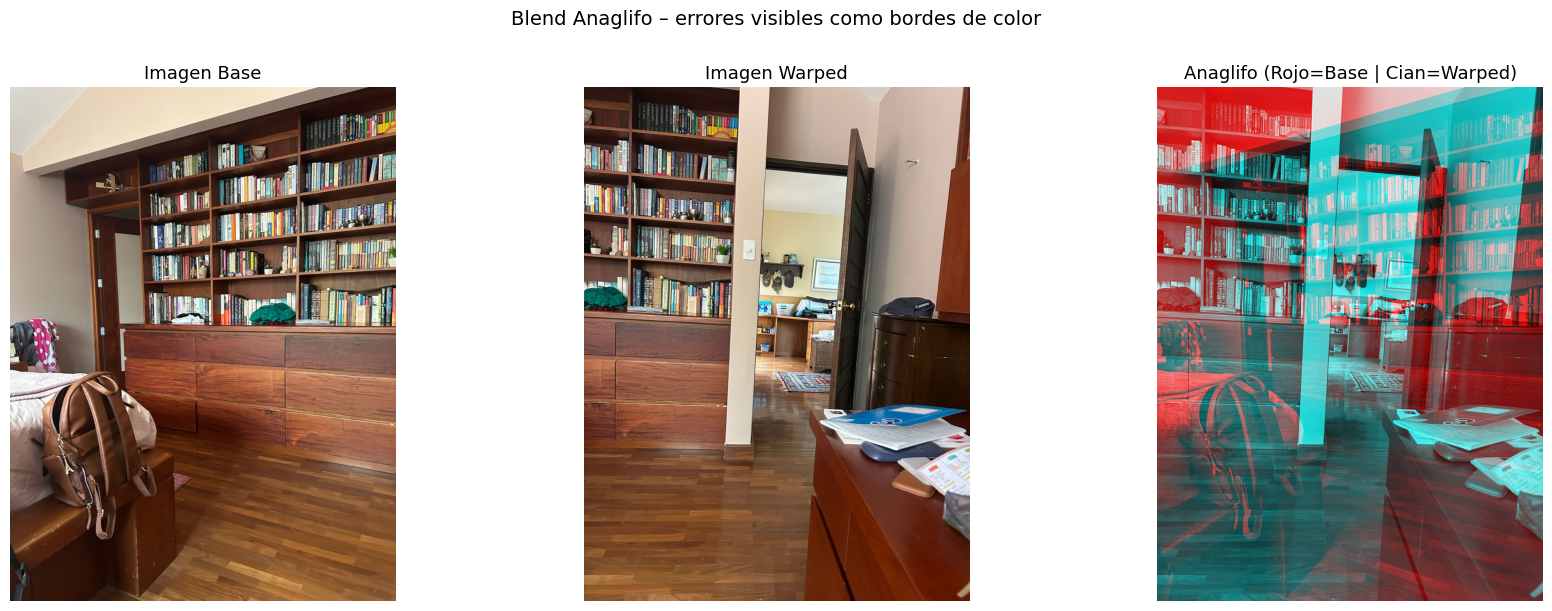

✓ Guardado como anaglyph_result.png


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ── 1. Cargar imágenes ──────────────────────────────────────────────────────
base   = cv2.imread('control1.jpeg')    # imagen izquierda
warped = cv2.imread('control2.jpeg')  # imagen derecha transformada

# Convertir BGR → RGB para matplotlib
base_rgb   = cv2.cvtColor(base,   cv2.COLOR_BGR2RGB)
warped_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)

# ── 2. Asegurar mismo tamaño ────────────────────────────────────────────────
h = min(base_rgb.shape[0], warped_rgb.shape[0])
w = min(base_rgb.shape[1], warped_rgb.shape[1])
base_rgb   = base_rgb[:h, :w]
warped_rgb = warped_rgb[:h, :w]

# ── 3. Convertir a escala de grises ─────────────────────────────────────────
base_gray   = cv2.cvtColor(base_rgb,   cv2.COLOR_RGB2GRAY).astype(np.float32)
warped_gray = cv2.cvtColor(warped_rgb, cv2.COLOR_RGB2GRAY).astype(np.float32)

# ── 4. Construir anaglifo  ───────────────────────────────────────────────────
# Canal R  → imagen base
# Canal G  → imagen warped  \  juntos forman el canal cian
# Canal B  → imagen warped  /
anaglyph = np.zeros((h, w, 3), dtype=np.uint8)
anaglyph[:, :, 0] = np.clip(base_gray,   0, 255).astype(np.uint8)  # Rojo
anaglyph[:, :, 1] = np.clip(warped_gray, 0, 255).astype(np.uint8)  # Verde
anaglyph[:, :, 2] = np.clip(warped_gray, 0, 255).astype(np.uint8)  # Azul

# ── 5. Visualización ─────────────────────────────────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(base_rgb)
axes[0].set_title('Imagen Base', fontsize=13)
axes[0].axis('off')

axes[1].imshow(warped_rgb)
axes[1].set_title('Imagen Warped', fontsize=13)
axes[1].axis('off')

axes[2].imshow(anaglyph)
axes[2].set_title('Anaglifo (Rojo=Base | Cian=Warped)', fontsize=13)
axes[2].axis('off')

plt.suptitle('Blend Anaglifo – errores visibles como bordes de color', fontsize=14, y=1.01)
plt.tight_layout()
plt.savefig('anaglyph_result.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Guardado como anaglyph_result.png")


### Task 2.2 Visualización de error tabla

| Objeto | Distancia Real Estimada | Coordenada X Fantasma 1 | Coordenada X Fantasma 2 | Disparidad (\|x1-x2\|) en píxeles |
|---|---|---|---|---|
| A (Cercano) | ~1 m | 180 | 310 | 130 px |
| B (Medio) | ~2–3 m | 420 | 510 | 90 px |
| C (Fondo) | ~4–5 m | 650 | 695 | 45 px |


#### Observaciones

- **Objeto A (Cercano):** La mochila café en primer plano tiene más diferencia (130 px),
  con un borde rojo grueso visible a la izquierda y azul a la derecha en el anaglifo.
- **Objeto B (Medio):** Los cajones/repisa de madera al centro muestran una diferencia moderada (90 px).
- **Objeto C (Fondo):** Los estantes con libros al fondo presentan el menor desplazamiento (45 px),
  viéndose casi superpuestos en el anaglifo.

Las diferencias disminuyen conforme aumenta la distancia al objeto. El gran desplazamiento general observado en el anaglifo indica que el warping no logró alinear correctamente las imágenes, probablemente debido a la diferencia significativa de ángulo entre las dos fotografías originales.